# Evaluation

## Review

1. Aquire
2. Prep
3. Split
4. Scale
5. Explore

## Evaluation

1. find line of best fit
2. is model good enough?
    - residuals
    - metrics
    - baseline
    - r2
    - significance of model: f-statistic
3. are features good enough?
    - significance of features: t-test
    - parameters and confidence interval

In [11]:
import warnings
warnings.filterwarnings('ignore')

### Acquire

In [12]:
import pandas as pd

df = pd.read_csv('student_grades.csv')

#### Summarize

In [13]:
df.head(2)

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95


In [14]:
df.shape

(104, 5)

In [15]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.543689,77.307692,81.692308
std,30.166206,14.329988,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.1+ KB


In [17]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [18]:
df.columns.values

array(['student_id', 'exam1', 'exam2', 'exam3', 'final_grade'],
      dtype=object)

In [19]:
df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

In [33]:
df.exam3.value_counts(ascending=True)

79     7
70     8
85     8
86     8
87     8
94     8
95     8
78    15
75    16
96    16
Name: exam3, dtype: int64

### Prep

In [43]:
import numpy as np

df.drop(columns=['student_id'], inplace=True)

In [44]:
df.replace(r'^\s+$', np.nan, regex=True, inplace=True)
df = df.dropna().astype('int')
df.dtypes

exam1          int64
exam2          int64
exam3          int64
final_grade    int64
dtype: object

#### Distributions

(array([16., 15.,  8.,  7.,  8., 16.,  0., 32.]),
 array([65., 69., 73., 77., 81., 85., 89., 93., 97.]),
 <a list of 8 Patch objects>)

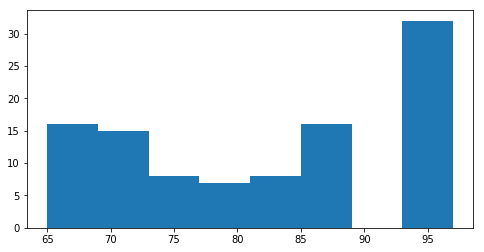

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,4))
plt.hist(df.final_grade, bins=8)

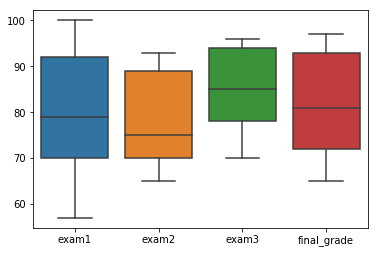

In [46]:
sns.boxplot(data=df)

### Split

In [47]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=.8, random_state=123)

### Scale
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, PowerTransformer

#### MinMaxScaler

- sensitive to the presence of outliers.   

- linear
- MaxAbsScaler: absolute values are mapped in the range 0,1. On positive only data, it's the same as min-max. sensitive to large outliers.


In [64]:
# create scaler object
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
# fit the object: 
scaler = scaler.fit(train)
# transform:
scaled_train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])

In [65]:
scaled_train.describe()

,exam1,exam2,exam3,final_grade
count,81.000000,81.000000,81.000000,81.000000
mean,0.464829,0.406966,0.511396,0.488812
std,0.314244,0.353449,0.322621,0.328322
min,0.000000,0.000000,0.000000,0.000000
25%,0.302326,0.178571,0.192308,0.218750
50%,0.511628,0.357143,0.576923,0.500000
75%,0.651163,0.642857,0.653846,0.687500
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(train)
# -or-
# scaler = MinMaxScaler(copy=True, feature_range=(0,1))
# scaler, scaled_train = scaler.fit_transform(train)

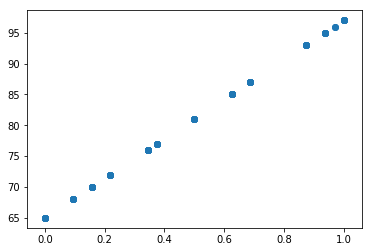

In [50]:
plt.scatter(scaled_train.final_grade, train.final_grade)

#### Standard Scaler

linear

#### QuantileTransformer - uniform

non-linear transformation

In [53]:
scaler = QuantileTransformer(n_quantiles=100, output_distribution='uniform', random_state=123, copy=True).fit(train)
uniform_train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])

In [54]:
uniform_train.describe()

,exam1,exam2,exam3,final_grade
count,81.000000,81.000000,81.00000,81.000000
mean,0.496451,0.475309,0.50787,0.497994
std,0.298942,0.329799,0.31128,0.302583
min,0.000000,0.000000,0.00000,0.000000
25%,0.318750,0.362500,0.16250,0.281250
50%,0.531250,0.531250,0.53125,0.531250
75%,0.712500,0.712500,0.71250,0.712500
max,1.000000,1.000000,1.00000,1.000000


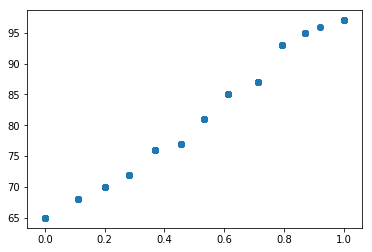

In [55]:
plt.scatter(uniform_train.final_grade, train.final_grade)

#### QuantileTransformer - normal 

non-linear  

In [57]:
scaler = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=123, copy=True).fit(train)
quantile_normal_train = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])

quantile_normal_train.describe()

,exam1,exam2,exam3,final_grade
count,81.000000,81.000000,81.000000,81.000000
mean,-0.221961,-0.665798,0.297102,-0.050254
std,1.889334,2.873595,2.513492,2.197602
min,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.471197,-0.351784,-0.984235,-0.579132
50%,0.078412,0.078412,0.078412,0.078412
75%,0.560703,0.560703,0.560703,0.560703
max,5.199338,5.199338,5.199338,5.199338


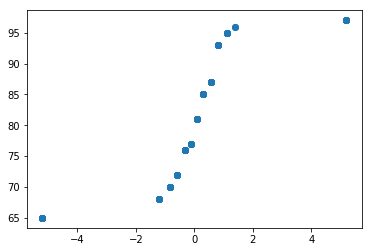

In [58]:
plt.scatter(quantile_normal_train.final_grade, train.final_grade)

### Explore

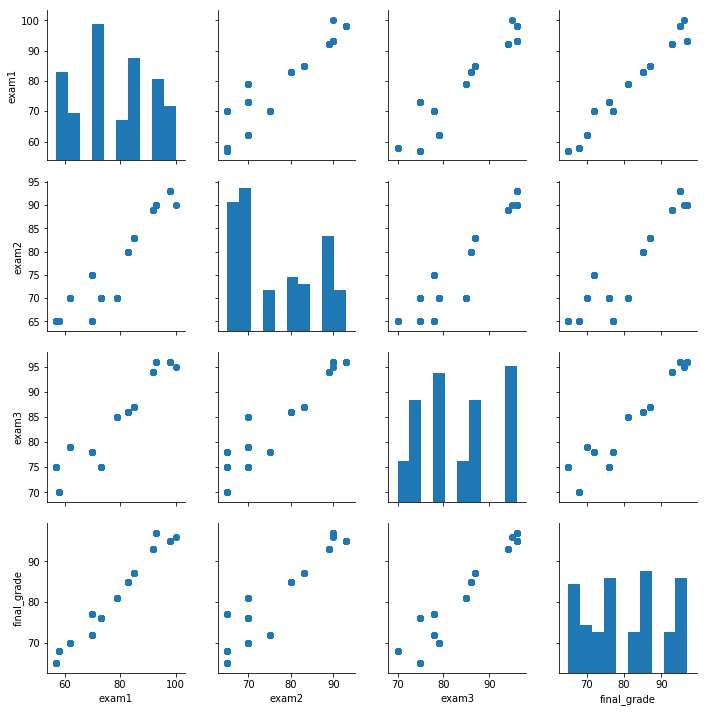

In [63]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

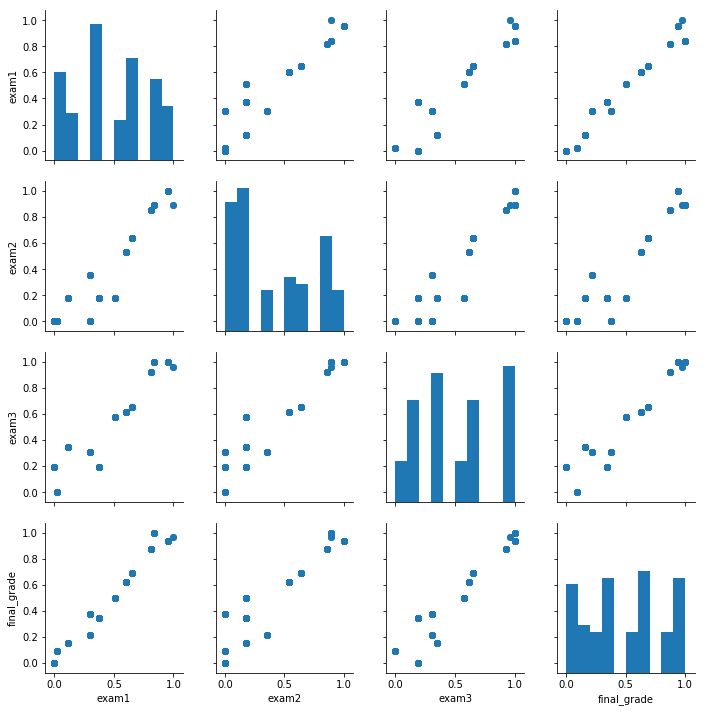

In [66]:
g = sns.PairGrid(scaled_train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

## Evaluation

1. find line of best fit
2. is model good enough?
    - residuals
    - metrics
    - baseline
    - r2
    - significance of model: f-statistic
3. are features good enough?
    - significance of features: t-test
    - parameters and confidence interval

In [67]:
# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), 
                  columns = ['x', 'y'])

x = df['x']
y = df['y']

df.head(3)

,x,y
0,100,96
1,93,90
2,84,89


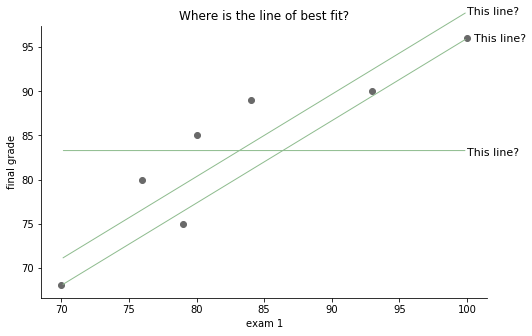

In [68]:
from viz import evaluation_example1, evaluation_example2, evaluation_example3, evaluation_example4, evaluation_example5
evaluation_example1(df, x, y)

### line of best fit

In [69]:
from statsmodels.formula.api import ols

ols_model = ols('y ~ x', data=df).fit()
df['yhat'] = ols_model.predict(x)
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     23.67
Date:                Fri, 11 Oct 2019   Prob (F-statistic):            0.00461
Time:                        12:16:07   Log-Likelihood:                -19.128
No. Observations:                   7   AIC:                             42.26
Df Residuals:                       5   BIC:                             42.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5111     14.641      0.855      0.432     -25.124      50.146
x              0.8512      0.175      4.866      0.005       0.402       1.301
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.983
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.776
Skew:                           0.124   Prob(JB):                        0.678
Kurtosis:                       1.388   Cond. No.                         737.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

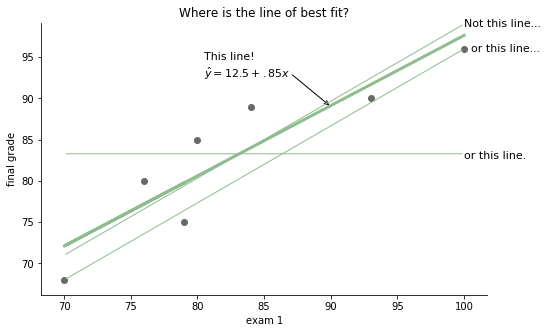

In [70]:
evaluation_example2(df, x, y)

### is model good enough?

In [71]:
df['residual'] = df['yhat'] - df['y']
df.head()

,x,y,yhat,residual
0,100,96,97.635214,1.635214
1,93,90,91.676524,1.676524
2,84,89,84.015350,-4.984650
3,80,85,80.610384,-4.389616
4,76,80,77.205418,-2.794582


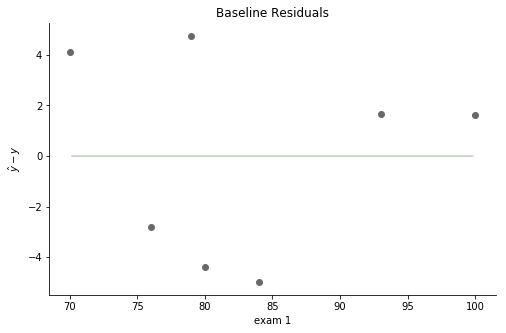

In [72]:
evaluation_example5(df, x, df.residual)

In [77]:
df['residual-2'] = df['residual'] ** 2
print(df.head())

SSE = sum(df['residual-2'])
MSE = SSE/len(df)
from math import sqrt
RMSE = sqrt(MSE)

print(SSE, MSE, RMSE)

     x   y       yhat  residual  residual-2
0  100  96  97.635214  1.635214    2.673926
1   93  90  91.676524  1.676524    2.810732
2   84  89  84.015350 -4.984650   24.846737
3   80  85  80.610384 -4.389616   19.268731
4   76  80  77.205418 -2.794582    7.809691
96.85259593679449 13.836085133827783 3.7196888490608706


In [78]:
from sklearn.metrics import mean_squared_error

In [80]:
mse_fcn = mean_squared_error(df.y, df.yhat)
sse_fcn = mse_fcn*len(df)
rmse_fcn = sqrt(mse_fcn)

print("mse: ", MSE==mse_fcn)
print("sse: ", SSE==sse_fcn)
print("rmse: ", RMSE==rmse_fcn)

mse:  True
sse:  True
rmse:  True


In [84]:
df_baseline = df[['x','y']]
df_baseline['yhat'] = df_baseline['y'].mean()
df_baseline.head()

,x,y,yhat
0,100,96,83.285714
1,93,90,83.285714
2,84,89,83.285714
3,80,85,83.285714
4,76,80,83.285714


In [85]:
df_baseline['residual'] = df_baseline.yhat-df_baseline.y

In [86]:
df_baseline['resid-squared'] = df_baseline.residual ** 2
df_baseline.head()

,x,y,yhat,residual,resid-squared
0,100,96,83.285714,-12.714286,161.653061
1,93,90,83.285714,-6.714286,45.081633
2,84,89,83.285714,-5.714286,32.653061
3,80,85,83.285714,-1.714286,2.938776
4,76,80,83.285714,3.285714,10.795918


In [91]:
sse = sum(df_baseline['resid-squared'])
mse = sse/len(df_baseline)
rmse = sqrt(mse)

print(sse, mse, rmse)
print(SSE, MSE, RMSE)

555.4285714285714 79.34693877551021 8.907689867497083
96.85259593679449 13.836085133827783 3.7196888490608706


In [90]:
mse_bl = mean_squared_error(df_baseline.y, df_baseline.yhat)
sse_bl = mse_bl*len(df)
rmse_bl = sqrt(mse_bl)

print("model is better?", MSE < mse_bl)

model is better? True


In [93]:
ESS = sum((df.yhat - df.y.mean())**2)
TSS = SSE + ESS
print(TSS)

R2 = ESS/TSS
R2

555.428571428571


0.8256254702784049

In [95]:
ols_model.rsquared


0.8256254702784049

In [96]:
from sklearn.metrics import r2_score, explained_variance_score

r2_score(df.y, df.yhat)

0.8256254702784049

In [97]:
explained_variance_score(df.y, df.yhat)

0.8256254702784049

In [100]:
ols_model.summary()
ols_model.f_pvalue

0.004610605426664649

### are features good enough?

In [101]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     23.67
Date:                Fri, 11 Oct 2019   Prob (F-statistic):            0.00461
Time:                        14:35:18   Log-Likelihood:                -19.128
No. Observations:                   7   AIC:                             42.26
Df Residuals:                       5   BIC:                             42.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5111     14.641      0.855      0.432     -25.124      50.146
x              0.8512      0.175      4.866      0.005       0.402       1.301
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.983
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.776
Skew:                           0.124   Prob(JB):                        0.678
Kurtosis:                       1.388   Cond. No.                         737.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Wider Confidence Interval = less confident, casting a wider net  
- Narrower Confidence Interval = more confident, casting a smaller net

In [102]:
df['yhat_lower'] = 12.5 + .402*df['x']

In [103]:
df['yhat_upper'] = 12.5 + 1.301*df['x']

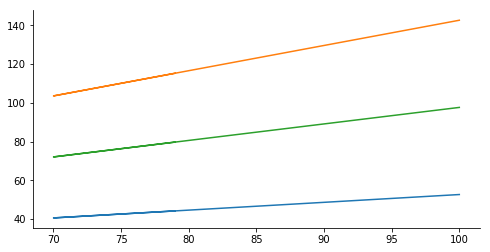

In [107]:
plt.figure(figsize=(8,4))
plt.plot(df.x, df.yhat_lower)
plt.plot(df.x, df.yhat_upper)
plt.plot(df.x, df.yhat)
plt.show()